# HW 20
## James Camacho

**Task:** Reproduce figures 7.1–7.3 of the textbook.

In [236]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiPolygon
from shapely.ops import polygonize, unary_union

# Multi-step method container
class LMM(object):
    def __init__(self, alpha, beta):
        """
        E.g. forward Euler method would have
            alpha = [-1, 1]
            beta = [1, 0]
            ==> 1*U_(n+1) - 1*U_n = h[1*f(U_n) + 0*f(U_(n+1))]
        """
        self.a = alpha
        self.b = beta
        
    def rho(self, z):
        return sum(c*z**n for n, c in enumerate(self.a))
    
    def sigma(self, z):
        return sum(c*z**n for n, c in enumerate(self.b))
        
    def solve_z(self, theta):
        z = np.exp(theta*1j)
        return self.rho(z)/self.sigma(z)
    
    def test_z(self, z):
        # Checks all the roots of the characteristic have magnitude <= 1.
        p = np.array(self.a) - z*np.array(self.b)
        p = p[::-1]
        roots = np.roots(p)
        for r in roots:
            if abs(r) > 1:
                return False
            if abs(r) == 1 and roots.tolist().count(r) > 1:
                return False
        return True
    
# Get bdry in x-y coords
def bdry(lmm):
    x, y = [], []
    for theta in np.linspace(0, 2*np.pi, 1000):
        z = lmm.solve_z(theta)
        x.append(z.real)
        y.append(z.imag)
    
    inside = lmm.test_z((sum(x)+1j*sum(y))/len(x))
    return x, y

def plot(ax, lmm, title=None, xlim=None, ylim=None):
    if xlim is None:
        xlim = [-2.5, 2.5]
    if ylim is None:
        ylim = [-2.5, 2.5]
    
    SQUARE_X = [xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]]
    SQUARE_Y = [ylim[0], ylim[0], ylim[1], ylim[1], ylim[0]]
    
    x, y = bdry(lmm)
    z = np.mean(x) + 1j*np.mean(y)
    
    if lmm.test_z(z):
        ax.fill(SQUARE_X, SQUARE_Y, color="white")
        ax.fill(x, y, color="black")
    else:
        ax.fill(SQUARE_X, SQUARE_Y, color="black")
        ax.fill(x, y, color="white")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)

### 7.1

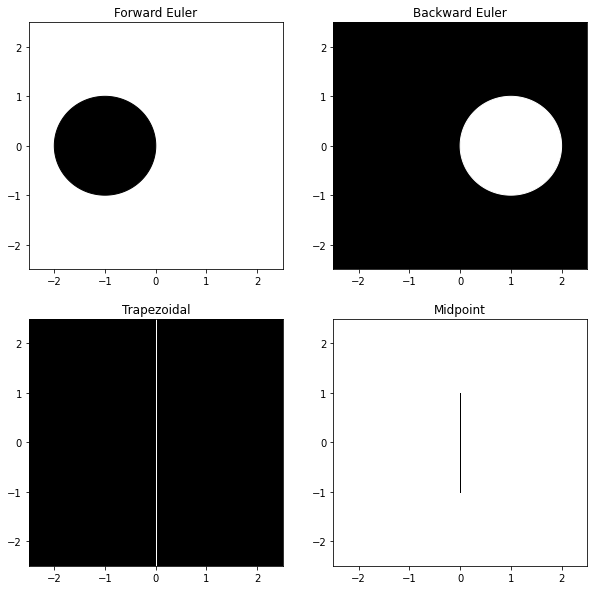

In [237]:
forward_euler = LMM([-1, 1], [1, 0])
backward_euler = LMM([-1, 1], [0, 1])
trapezoidal = LMM([-1, 1], [0.5, 0.5])
midpoint = LMM([-1, 0, 1], [0, 2, 0])

fig, ax = plt.subplots(2, 2, figsize=(10,10))

plot(ax[0, 0], forward_euler, "Forward Euler")
plot(ax[0, 1], backward_euler, "Backward Euler")
plot(ax[1, 0], trapezoidal, "Trapezoidal")
plot(ax[1, 1], midpoint, "Midpoint")


plt.show();

The trapezoidal method gets the right boundary, but my plotting logic isn't smart enough to fill it.

### 7.2
**Adams-Bashforth Methods**

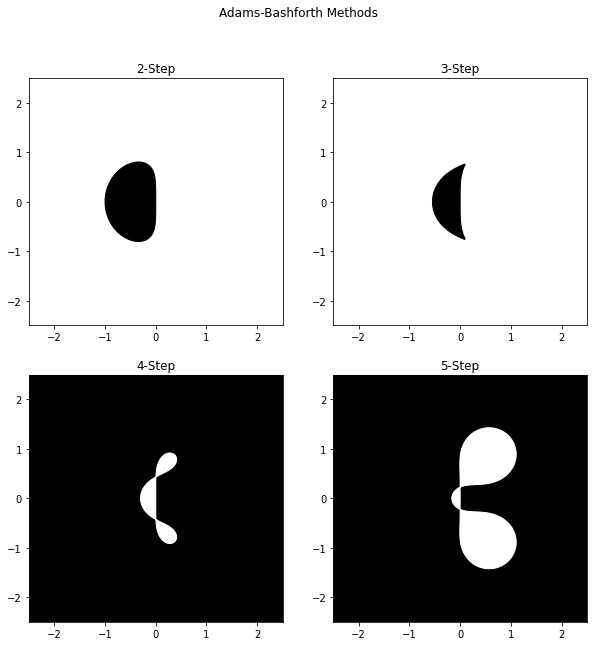

In [238]:
two_step = LMM([0, -1, 1], [-0.5, 1.5, 0])
three_step = LMM([0, 0, -1, 1], [5/12, -16/12, 23/12, 0])
four_step = LMM([0, 0, 0, -1, 1], [-9/24, 37/24, -59/24, 55/24, 0])
five_step = LMM([0, 0, 0, 0, -1, 1], [251/720, -1274/720, 2616/720, -2774/720, 1901/720, 0])

fig, ax = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle("Adams-Bashforth Methods")
plot(ax[0, 0], two_step, "2-Step")
plot(ax[0, 1], three_step, "3-Step")
plot(ax[1, 0], four_step, "4-Step")
plot(ax[1, 1], five_step, "5-Step")

plt.show();

Again, the plotting isn't perfect.

### 7.3
**Adams-Moulton Methods**

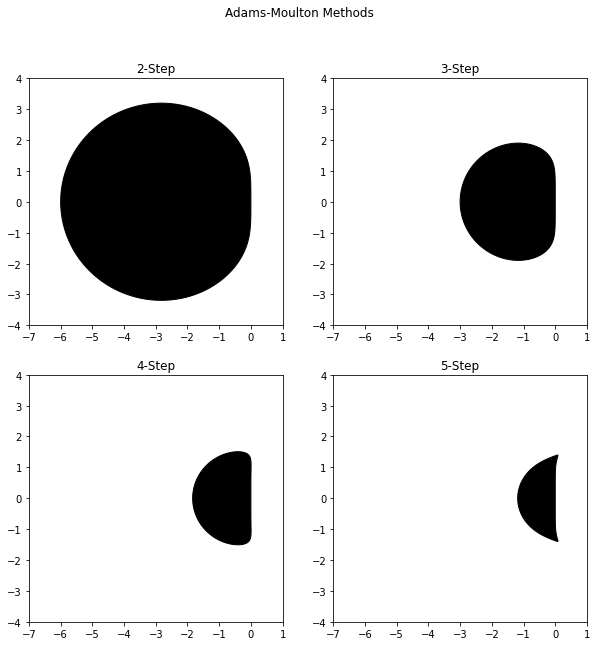

In [239]:
two_step = LMM([0, -1, 1], [-1/12, 8/12, 5/12])
three_step = LMM([0, 0, -1, 1], [1/24, -5/24, 19/24, 9/24])
four_step = LMM([0, 0, 0, -1, 1], [-19/720, 106/720, -264/720, 646/720, 251/720])
five_step = LMM([0, 0, 0, 0, -1, 1],[27/1440, -173/1440, 482/1440, -798/1440, 1426/1440, 475/1440])

fig, ax = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle("Adams-Moulton Methods")
plot(ax[0, 0], two_step, "2-Step", xlim=[-7, 1], ylim=[-4, 4])
plot(ax[0, 1], three_step, "3-Step", xlim=[-7, 1], ylim=[-4, 4])
plot(ax[1, 0], four_step, "4-Step", xlim=[-7, 1], ylim=[-4, 4])
plot(ax[1, 1], five_step, "5-Step", xlim=[-7, 1], ylim=[-4, 4])

plt.show();

In [216]:
# Some code to find the 5-step Adams-Moulton method.

ii = np.arange(1, 7)
j = np.array([0, 1, 2, 3, 4, 5])
M = np.array([i*j**(i-1) for i in ii])
A = 5**ii - 4**ii

np.linalg.solve(M, A)

array([ 0.01875   , -0.12013889,  0.33472222, -0.55416667,  0.99097222,
        0.32986111])